<a href="https://colab.research.google.com/github/MacsEli/DocumentosDeClase/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/Databases/Week 17/titanic.csv')


In [ ]:
titanic.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_drop = titanic.drop(columns=['Name','Cabin','PassengerId','Ticket'])

In [ ]:
titanic_drop

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
titanic_missing = titanic_drop.dropna()
titanic_missing

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
import seaborn as sns

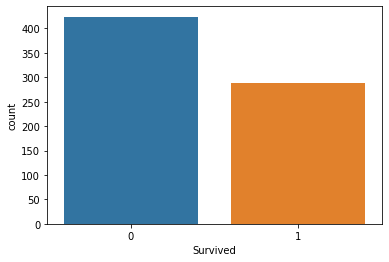

In [ ]:
sns.countplot(x='Survived', data= titanic_missing)

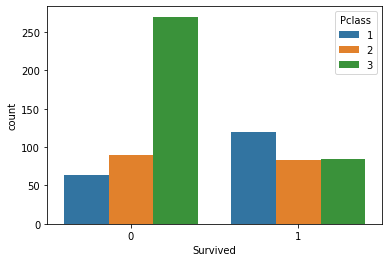

In [ ]:
sns.countplot(x='Survived', hue='Pclass',data= titanic_missing)

In [ ]:
titanic_missing.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [ ]:
#Obteneer Dummies Variables categoricas
titanic_con_dummies = pd.get_dummies(titanic_missing, columns=['Pclass','Sex','Embarked'],drop_first=True)
titanic_con_dummies.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [ ]:
#importar la funcion de Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
y = titanic_con_dummies['Survived']
x = titanic_con_dummies.drop('Survived',axis=1).copy()

In [ ]:
x.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
#Datasets de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=.20, random_state=101)

In [ ]:
#liblinear es una buena elección cuanto tenemos datasets pequeños

titanic_model = LogisticRegression(solver='liblinear')
titanic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = titanic_model.predict(X_test)
df_predicted = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_predicted

,Actual,Predicted
225,0,0
449,1,0
750,1,1
261,1,0
283,1,0
...,...,...
230,1,1
371,0,0
700,1,1
833,0,0


In [ ]:
#Tener presente que score regresa la metrica de Accuracy
#Esta es el numero de predcciones correctas contra el total
titanic_model.score(X_train,y_train)

0.8014059753954306

In [ ]:
titanic_model.score(X_tets,y_test)

0.7972027972027972

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7972027972027972

In [ ]:
#Persitiendo el modelo para usarlo después
from joblib import dump, load
dump(titanic_model, 'model_titanic.joblib')

['model_titanic.joblib']

In [ ]:
#Cargando modelo
t_model_load = load('model_titanic.joblib')

In [ ]:
y_pred = t_model_load.predict(X_test)
df_predicted = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_predicted

,Actual,Predicted
225,0,0
449,1,0
750,1,1
261,1,0
283,1,0
...,...,...
230,1,1
371,0,0
700,1,1
833,0,0
